# 2.	CARGA DE DATOS

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [94]:
import statsmodels.api as sm
import statsmodels.formula.api as sms
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.compat import lzip

In [95]:
import pandas_datareader as pdr

In [96]:
df = pd.read_csv("/content/Walmart(1).csv")
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [97]:
df.rename({'Store':'Tienda', 'Date':'Fecha', 'Weekly_Sales': 'Ventasportienda',
           'Holiday_Flag': 'Vacaciones', 'Temperature': 'Temperatura', 'Fuel_Price': 'Preciocombustible',
           'CPI': 'Indicedeprecios', 'Unemployment': 'Desempleo' }, axis=1, inplace=True)

In [98]:
!pip install linearmodels

# 3.	DESCRIPCION DE VARIABLES

In [99]:
df.dtypes

,0
Tienda,int64
Fecha,object
Ventasportienda,float64
Vacaciones,int64
Temperatura,float64
Preciocombustible,float64
Indicedeprecios,float64
Desempleo,float64


In [100]:
# Convertir 'Tienda' a tipo categórico
df['Tienda'] = df['Tienda'].astype('category')

# Convertir 'Vacaciones' a tipo categórico
df['Vacaciones'] = df['Vacaciones'].astype('category')

# Convertir 'Fecha' a tipo datetime
df['Fecha'] = pd.to_datetime(df['Fecha'], dayfirst=True)

In [101]:
df.dtypes

,0
Tienda,category
Fecha,datetime64[ns]
Ventasportienda,float64
Vacaciones,category
Temperatura,float64
Preciocombustible,float64
Indicedeprecios,float64
Desempleo,float64


3.1	Variables numéricas

In [102]:
df.describe()

,Fecha,Ventasportienda,Temperatura,Preciocombustible,Indicedeprecios,Desempleo
count,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000
mean,2011-06-17 00:00:00,1.046965e+06,60.663782,3.358607,171.578394,7.999151
min,2010-02-05 00:00:00,2.099862e+05,-2.060000,2.472000,126.064000,3.879000
25%,2010-10-08 00:00:00,5.533501e+05,47.460000,2.933000,131.735000,6.891000
50%,2011-06-17 00:00:00,9.607460e+05,62.670000,3.445000,182.616521,7.874000
75%,2012-02-24 00:00:00,1.420159e+06,74.940000,3.735000,212.743293,8.622000
max,2012-10-26 00:00:00,3.818686e+06,100.140000,4.468000,227.232807,14.313000
std,NaN,5.643666e+05,18.444933,0.459020,39.356712,1.875885


3.2	Variables categóricas

In [103]:
df.describe(include='category')

,Tienda,Vacaciones
count,6435,6435
unique,45,2
top,1,0
freq,143,5985


# 4.	DATOS PERDIDOS

In [104]:
df.isnull().sum()

,0
Tienda,0
Fecha,0
Ventasportienda,0
Vacaciones,0
Temperatura,0
Preciocombustible,0
Indicedeprecios,0
Desempleo,0


# 5.	DATOS ATÍPICOS (OUTLIERS)

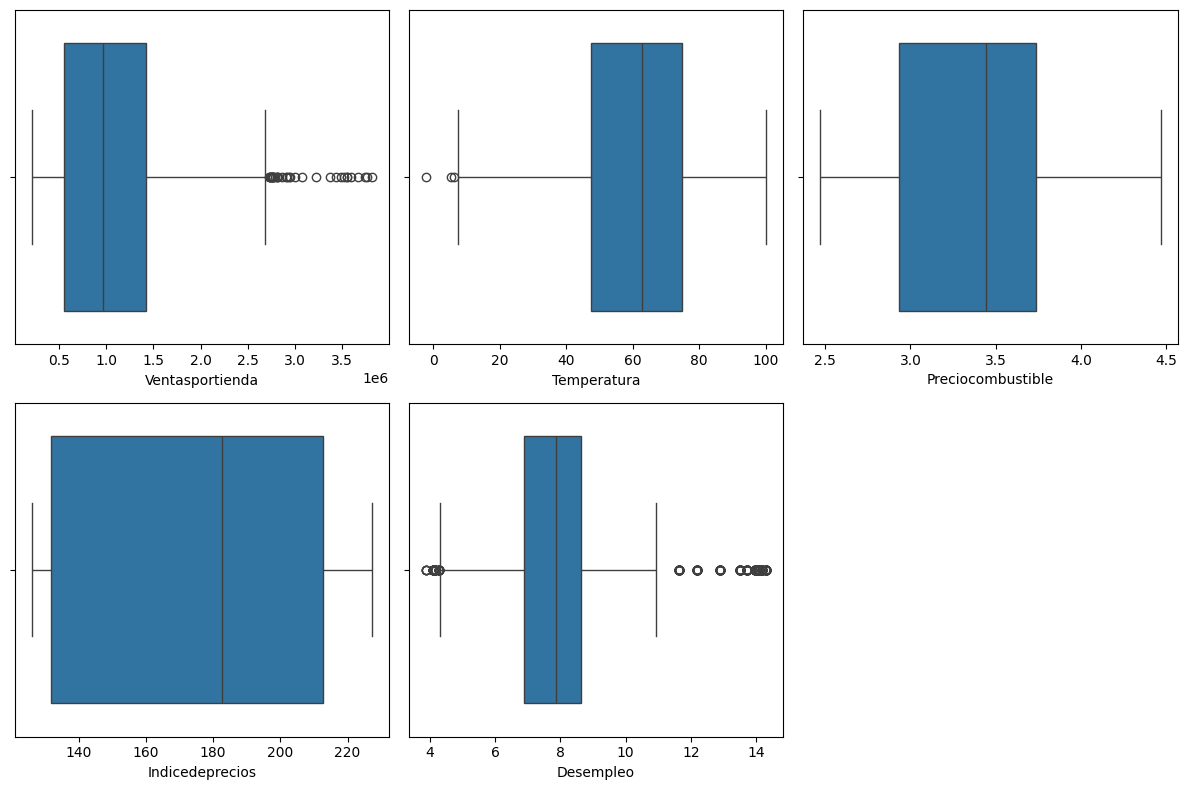

In [105]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
sns.boxplot(x=df['Ventasportienda'])

plt.subplot(2, 3, 2)
sns.boxplot(x=df['Temperatura'])

plt.subplot(2, 3, 3)
sns.boxplot(x=df['Preciocombustible'])

plt.subplot(2, 3, 4)
sns.boxplot(x=df['Indicedeprecios'])

plt.subplot(2, 3, 5)
sns.boxplot(x=df['Desempleo'])

plt.tight_layout()
plt.show()


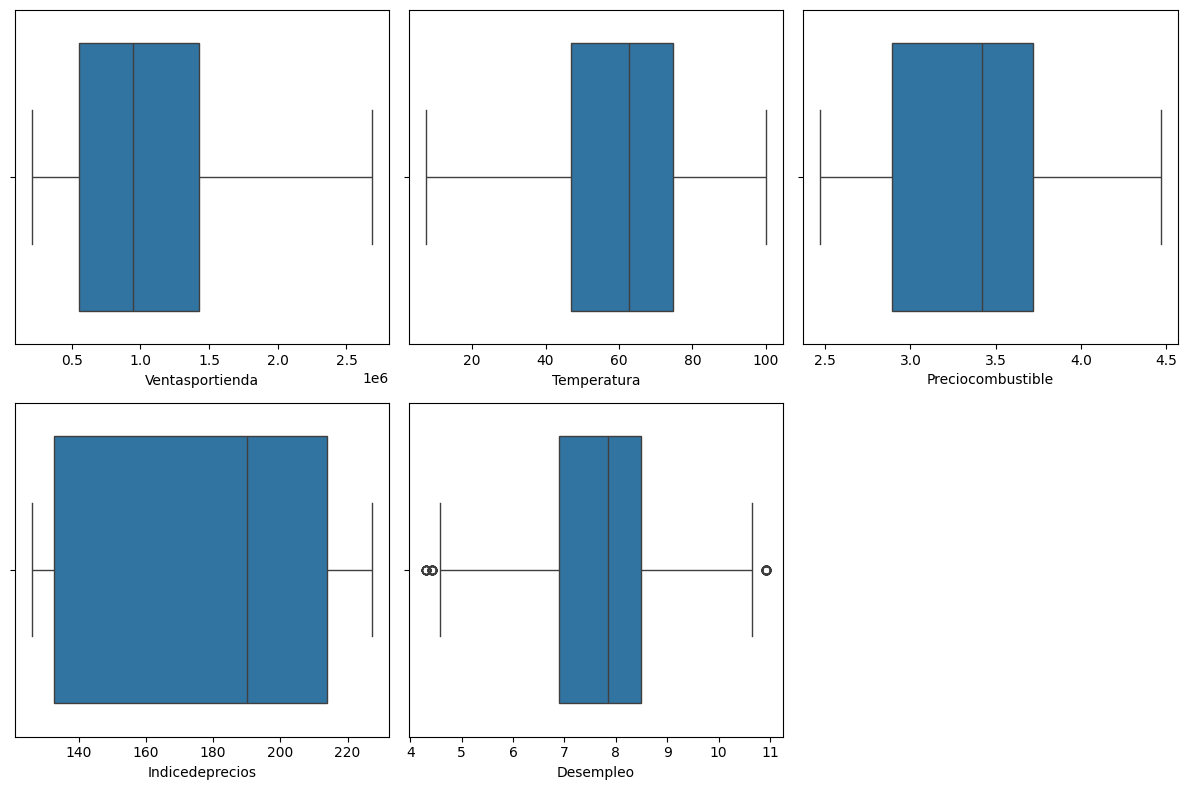

In [106]:
# prompt: eliminar outliers

import matplotlib.pyplot as plt
# Eliminar outliers de Ventasportienda
Q1_ventas = df['Ventasportienda'].quantile(0.25)
Q3_ventas = df['Ventasportienda'].quantile(0.75)
IQR_ventas = Q3_ventas - Q1_ventas
limite_inferior_ventas = Q1_ventas - 1.5 * IQR_ventas
limite_superior_ventas = Q3_ventas + 1.5 * IQR_ventas
df = df[(df['Ventasportienda'] >= limite_inferior_ventas) & (df['Ventasportienda'] <= limite_superior_ventas)]

# Eliminar outliers de Temperatura
Q1_temp = df['Temperatura'].quantile(0.25)
Q3_temp = df['Temperatura'].quantile(0.75)
IQR_temp = Q3_temp - Q1_temp
limite_inferior_temp = Q1_temp - 1.5 * IQR_temp
limite_superior_temp = Q3_temp + 1.5 * IQR_temp
df = df[(df['Temperatura'] >= limite_inferior_temp) & (df['Temperatura'] <= limite_superior_temp)]

# Eliminar outliers de Desempleo
Q1_desempleo = df['Desempleo'].quantile(0.25)
Q3_desempleo = df['Desempleo'].quantile(0.75)
IQR_desempleo = Q3_desempleo - Q1_desempleo
limite_inferior_desempleo = Q1_desempleo - 1.5 * IQR_desempleo
limite_superior_desempleo = Q3_desempleo + 1.5 * IQR_desempleo
df = df[(df['Desempleo'] >= limite_inferior_desempleo) & (df['Desempleo'] <= limite_superior_desempleo)]

plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
sns.boxplot(x=df['Ventasportienda'])

plt.subplot(2, 3, 2)
sns.boxplot(x=df['Temperatura'])

plt.subplot(2, 3, 3)
sns.boxplot(x=df['Preciocombustible'])

plt.subplot(2, 3, 4)
sns.boxplot(x=df['Indicedeprecios'])

plt.subplot(2, 3, 5)
sns.boxplot(x=df['Desempleo'])

plt.tight_layout()
plt.show()


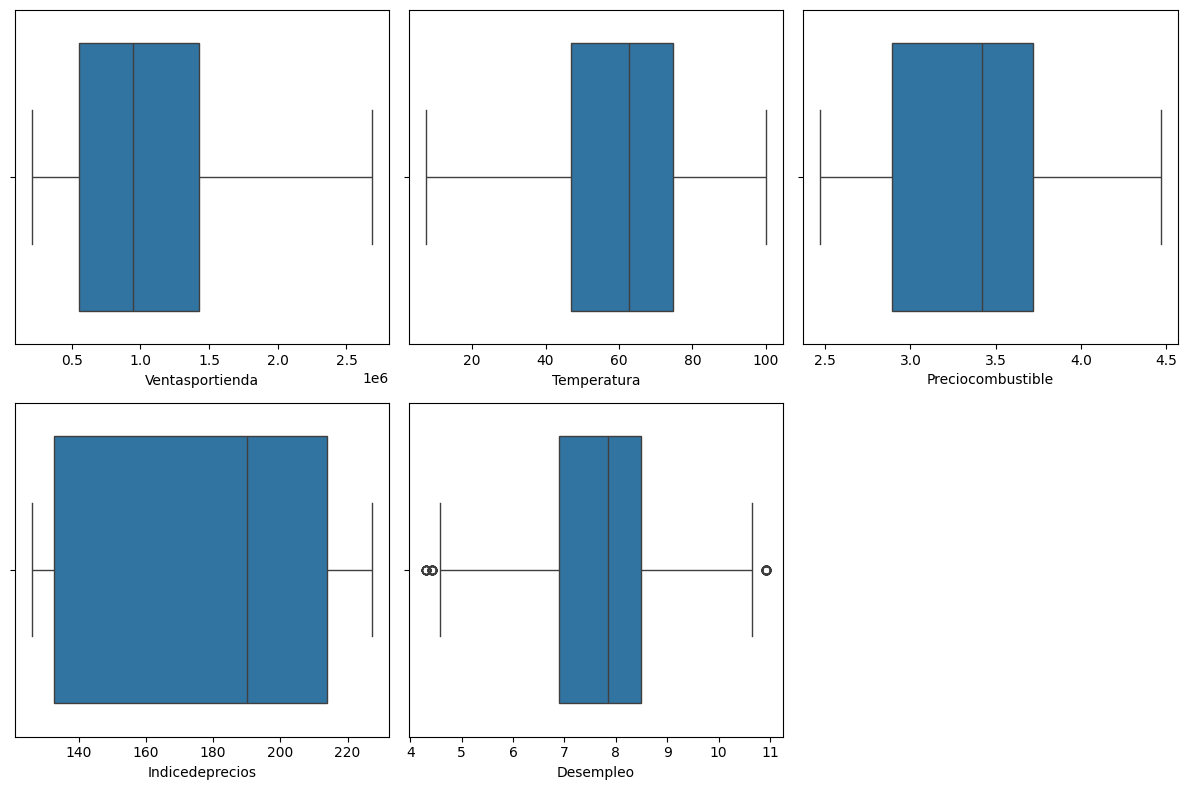

In [107]:
# Verificar si los outliers fueron reemplazados
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
sns.boxplot(x=df['Ventasportienda'])

plt.subplot(2, 3, 2)
sns.boxplot(x=df['Temperatura'])

plt.subplot(2, 3, 3)
sns.boxplot(x=df['Preciocombustible'])

plt.subplot(2, 3, 4)
sns.boxplot(x=df['Indicedeprecios'])

plt.subplot(2, 3, 5)
sns.boxplot(x=df['Desempleo'])

plt.tight_layout()
plt.show()

#6.	DISTRIBUCIONES DE LAS VARIABLES

<Axes: xlabel='Ventasportienda', ylabel='Density'>

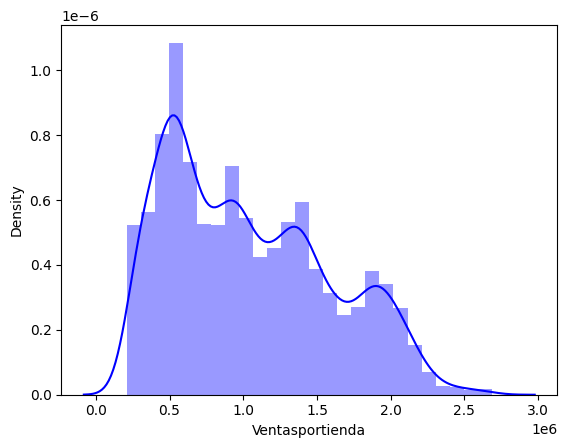

In [108]:
sns.distplot(df['Ventasportienda'],color="blue")

<Axes: xlabel='Temperatura', ylabel='Density'>

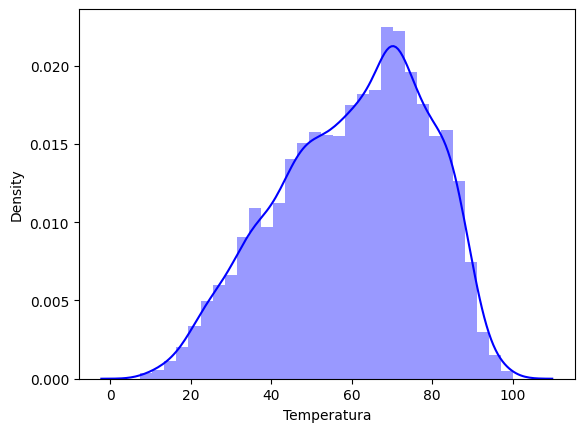

In [109]:
sns.distplot(df['Temperatura'],color="blue")

<Axes: xlabel='Preciocombustible', ylabel='Density'>

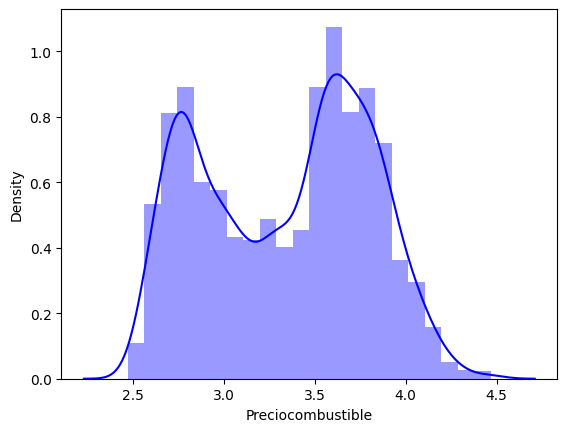

In [110]:
sns.distplot(df['Preciocombustible'],color="blue")

<Axes: xlabel='Indicedeprecios', ylabel='Density'>

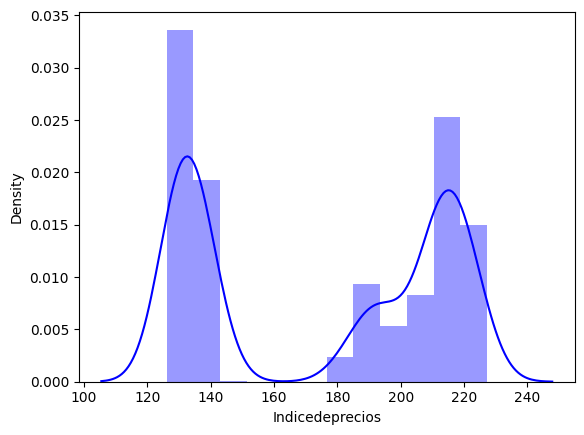

In [111]:
sns.distplot(df['Indicedeprecios'],color="blue")

<Axes: xlabel='Desempleo', ylabel='Density'>

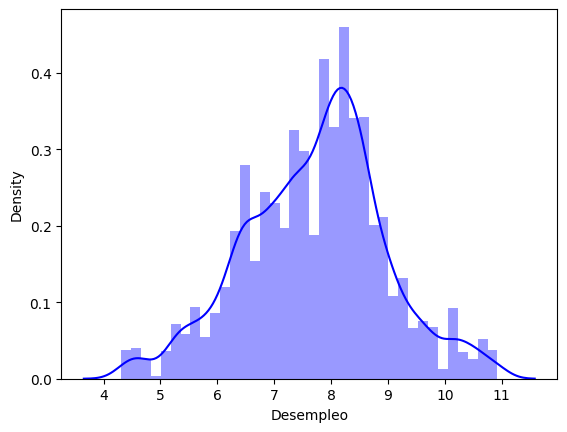

In [112]:
sns.distplot(df['Desempleo'],color="blue")

# 7.	CORRELACIONES

In [113]:
numerical_df = df.select_dtypes(include=['number'])
numerical_df.corr()

,Ventasportienda,Temperatura,Preciocombustible,Indicedeprecios,Desempleo
Ventasportienda,1.000000,-0.041686,0.019664,-0.082977,-0.073092
Temperatura,-0.041686,1.000000,0.145157,0.217847,0.024204
Preciocombustible,0.019664,0.145157,1.000000,-0.144515,-0.105214
Indicedeprecios,-0.082977,0.217847,-0.144515,1.000000,-0.219020
Desempleo,-0.073092,0.024204,-0.105214,-0.219020,1.000000


In [114]:
numerical_df.corr().style.background_gradient(cmap='coolwarm')

,Ventasportienda,Temperatura,Preciocombustible,Indicedeprecios,Desempleo
Ventasportienda,1.000000,-0.041686,0.019664,-0.082977,-0.073092
Temperatura,-0.041686,1.000000,0.145157,0.217847,0.024204
Preciocombustible,0.019664,0.145157,1.000000,-0.144515,-0.105214
Indicedeprecios,-0.082977,0.217847,-0.144515,1.000000,-0.219020
Desempleo,-0.073092,0.024204,-0.105214,-0.219020,1.000000


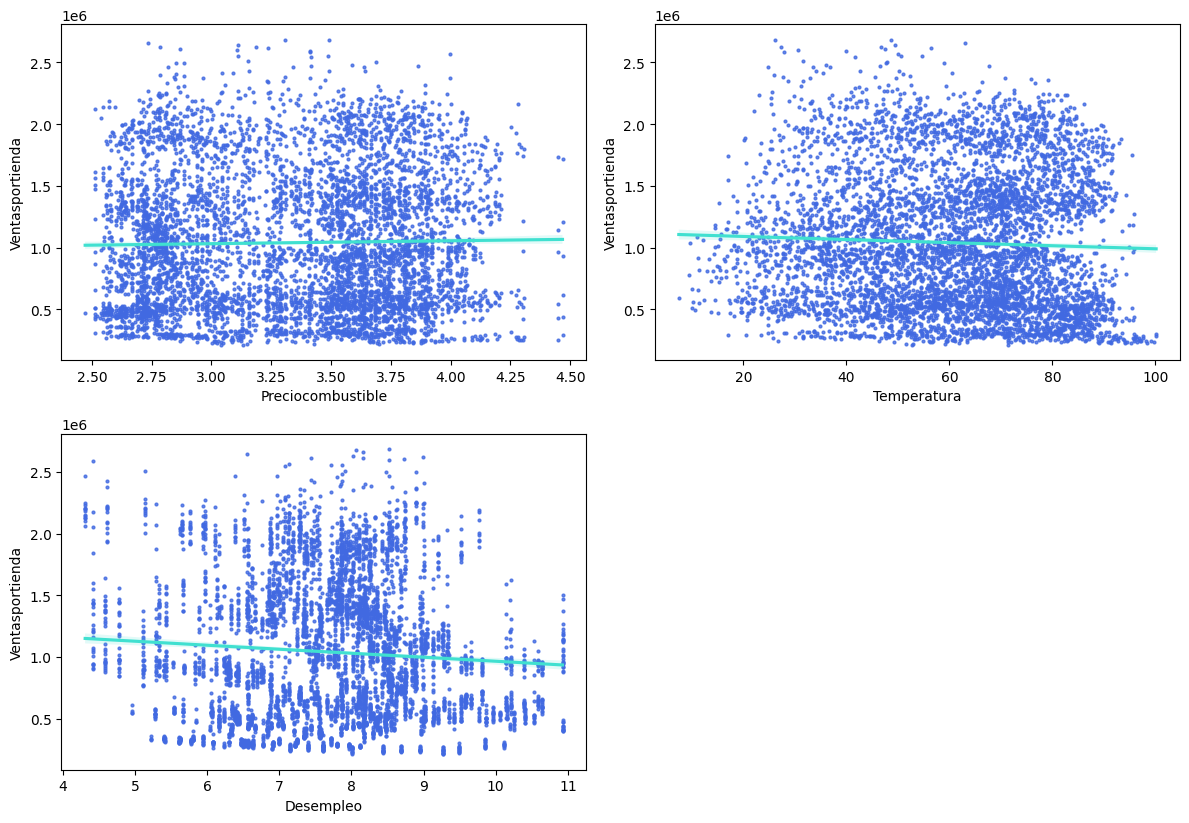

In [115]:
# Número de las variables
n = 5
fig = plt.figure(figsize=(12,12))
# Correlaciones en pares
corr = numerical_df.corr()
#
cols = corr.nlargest(4, "Ventasportienda")["Ventasportienda"].index
# Calculate correlation
for i in np.arange(1,4):
    regline = df[cols[i]]
    ax = fig.add_subplot(3,2,i)
    sns.regplot(x=regline, y=df['Ventasportienda'], scatter_kws={"color": "royalblue", "s": 4},
                line_kws={"color": "turquoise"})
plt.tight_layout()
plt.show()

# 9.	TIPO DE MODELIZACIÓN

Modelo de Machine Learning

# 11.	MODELO DEFINITIVO

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [117]:
from sklearn.linear_model import LinearRegression

In [118]:
var_cuantitativas = df.select_dtypes('number').columns
var_cualitativas  =df.select_dtypes('object').columns

In [119]:
from sklearn.preprocessing import LabelEncoder

In [120]:
# creating instance of labelencoder
labelencoder = LabelEncoder()

In [121]:
df[var_cualitativas] = df[var_cualitativas].apply(labelencoder.fit_transform)

In [122]:
X = df[df.columns.difference(['Ventasportienda'])]
y = df.Ventasportienda

In [123]:
# prompt: realizar un train/split aleatorio, considerar que  la base de datos contine la variable tiempo

from sklearn.model_selection import train_test_split

# Ordenar el DataFrame por fecha
df_sorted = df.sort_values('Fecha')

# Realizar el train/test split respetando el orden temporal
X_train, X_test, y_train, y_test = train_test_split(
    df_sorted[df_sorted.columns.difference(['Ventasportienda'])],
    df_sorted['Ventasportienda'],
    test_size=0.2,
    shuffle=False
)


In [124]:
print(X_train.shape,"",type(X_train))
print(y_train.shape,"\t ",type(y_train))
print(X_test.shape,"",type(X_test))
print(y_test.shape,"\t ",type(y_test))

(4733, 7)  <class 'pandas.core.frame.DataFrame'>
(4733,) 	  <class 'pandas.core.series.Series'>
(1184, 7)  <class 'pandas.core.frame.DataFrame'>
(1184,) 	  <class 'pandas.core.series.Series'>


**El Modelo de Regresión Lineal por Sklearn**

In [125]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df['Fecha_Numerica'] = (df['Fecha'] - pd.Timestamp('1970-01-01')).dt.days

# Ordenar el DataFrame por fecha
df_sorted = df.sort_values('Fecha')

# Realizar el train/test split respetando el orden temporal
df_sorted = df_sorted.drop('Fecha', axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    df_sorted[df_sorted.columns.difference(['Ventasportienda'])],
    df_sorted['Ventasportienda'],
    test_size=0.2,
    shuffle=False
)

modelo_regresion = LinearRegression()
modelo_regresion.fit(X_train, y_train)

LinearRegression()

In [126]:
predicciones_train = modelo_regresion.predict(X_train)
predicciones_test = modelo_regresion.predict(X_test)

In [127]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [128]:
MSE_train = mean_squared_error(y_train, predicciones_train)
MSE_test = mean_squared_error(y_test, predicciones_test)
print(MSE_train)
print(MSE_test)

268622186995.88998
256166840832.54153


In [129]:
RMSE_train = np.sqrt(MSE_train)
RMSE_test = np.sqrt(MSE_test)
print(RMSE_train)
print(RMSE_test)

518287.74536534236
506129.27284690965


In [130]:
MAE_train = mean_absolute_error(y_train, predicciones_train)
MAE_test = mean_absolute_error(y_test, predicciones_test)
print(MAE_train)
print(MAE_test)

432719.147438395
428650.3986565071


In [131]:
from sklearn.metrics import r2_score

In [143]:
r_square_train = r2_score(y_train, predicciones_train)
r_square_test  = r2_score(y_test, predicciones_test)
print('El R^2 del subconjunto de entrenamiento es:' , r_square_train.round(2))
print('El R^2 del subconjunto de prueba es:' , r_square_test.round(2))

El R^2 del subconjunto de entrenamiento es: 0.13
El R^2 del subconjunto de prueba es: 0.1


In [144]:
print('intercepto:', modelo_regresion.intercept_)
print('pendiente:', modelo_regresion.coef_)

intercepto: 1831090.2157960408
pendiente: [ 6.16087532e+02 -1.10030275e+01 -2.28555353e+03  4.05883573e+04
 -3.26024691e+02 -1.51591234e+04  5.95123658e+04]


# 12.	COMPARACIÓN VALORES MODELO CON VALORES REALES

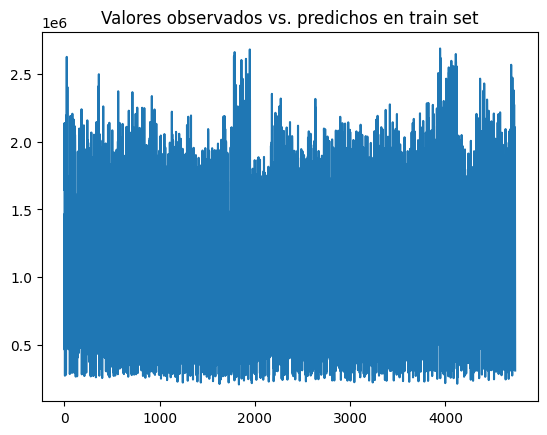

In [134]:
fig, ax = plt.subplots()
ax.plot(y_train.values)

plt.title("Valores observados vs. predichos en train set");

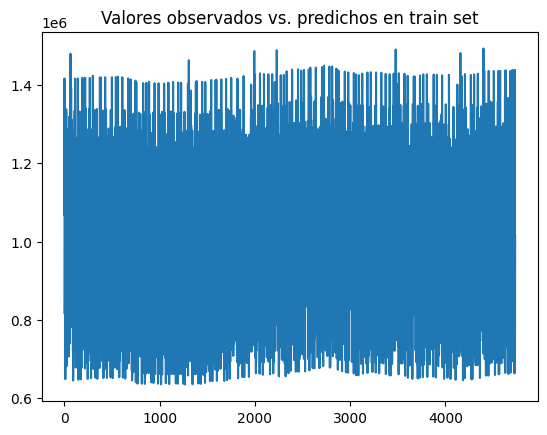

In [135]:
fig, ax = plt.subplots()
ax.plot(predicciones_train)

plt.title("Valores observados vs. predichos en train set");

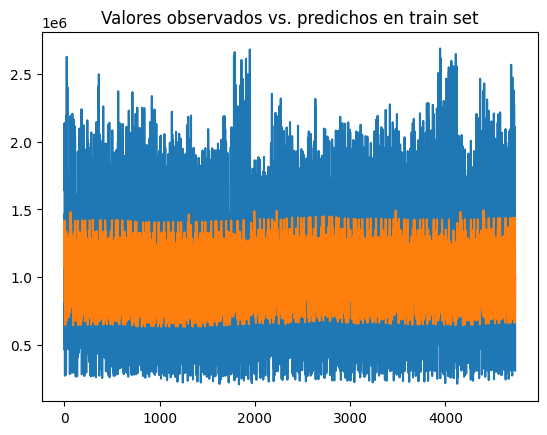

In [136]:
fig, ax = plt.subplots()
ax.plot(y_train.values)
ax.plot(predicciones_train)
plt.title("Valores observados vs. predichos en train set");

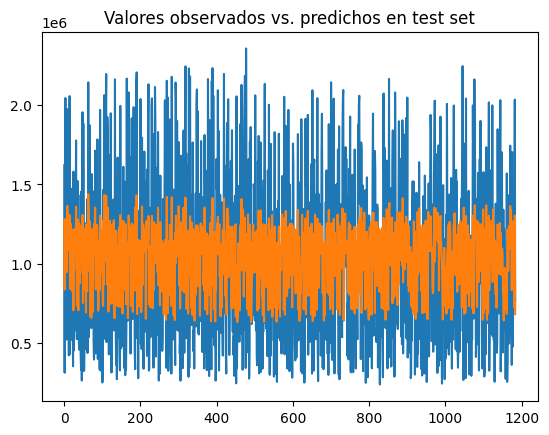

In [137]:
fig, ax = plt.subplots()
ax.plot(y_test.values)
ax.plot(predicciones_test)
plt.title("Valores observados vs. predichos en test set");

In [147]:
from sklearn.preprocessing import StandardScaler

In [146]:
sc = StandardScaler()

In [145]:
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)